In [1]:
import pandas as pd

df = pd.read_csv("customer_churn_data.csv")
df.dropna(inplace=True)
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv           10000 non-null  object 
 15  str

,age,senior_citizen,tenure,monthly_charges,total_charges,customer_satisfaction,support_calls
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.662500,0.092300,22.216800,53.640204,1192.146321,3.399300,2.007400
std,14.397976,0.289463,19.963232,17.047669,1193.960345,1.069193,1.415184
min,18.000000,0.000000,1.000000,20.050000,20.320000,1.000000,0.000000
25%,34.000000,0.000000,6.000000,40.407500,306.305000,3.000000,1.000000
50%,44.000000,0.000000,16.000000,51.770000,796.955000,3.000000,2.000000
75%,55.000000,0.000000,33.000000,66.280000,1681.077500,4.000000,3.000000
max,80.000000,1.000000,72.000000,111.810000,7078.800000,5.000000,9.000000


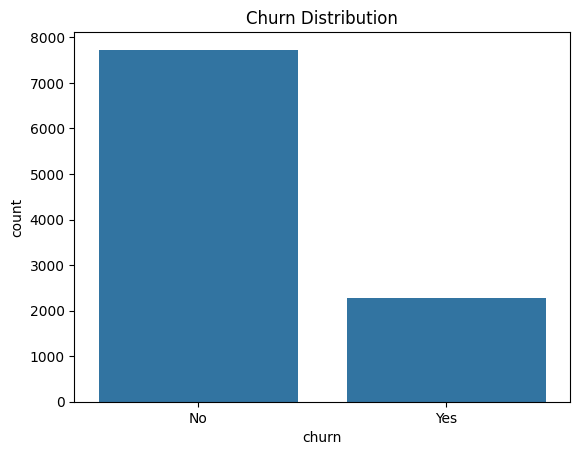

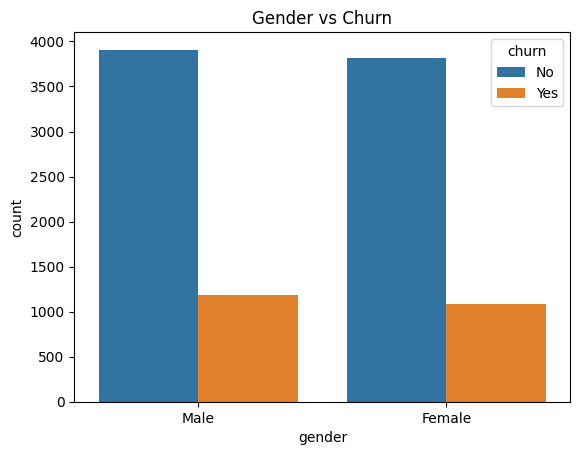

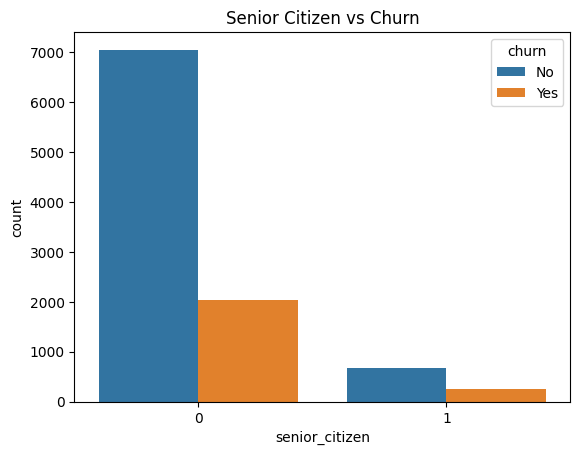

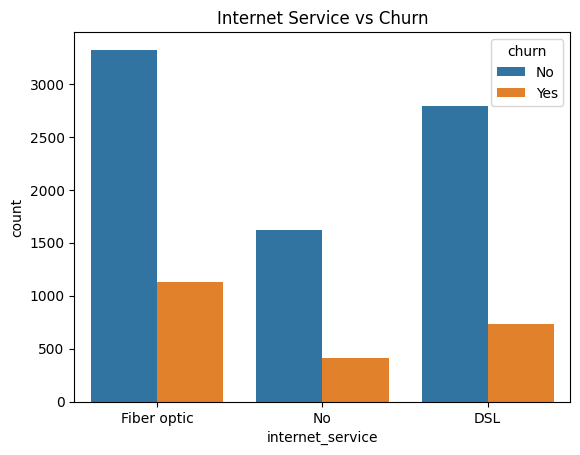

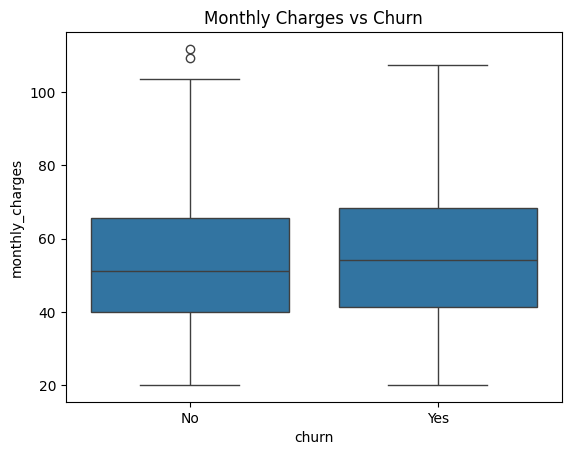

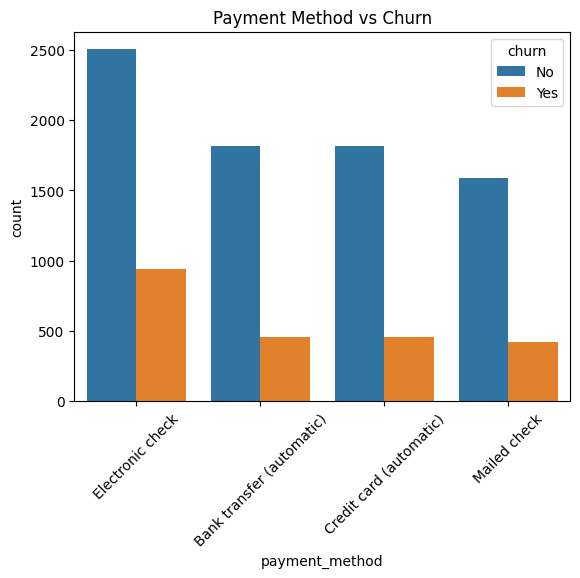

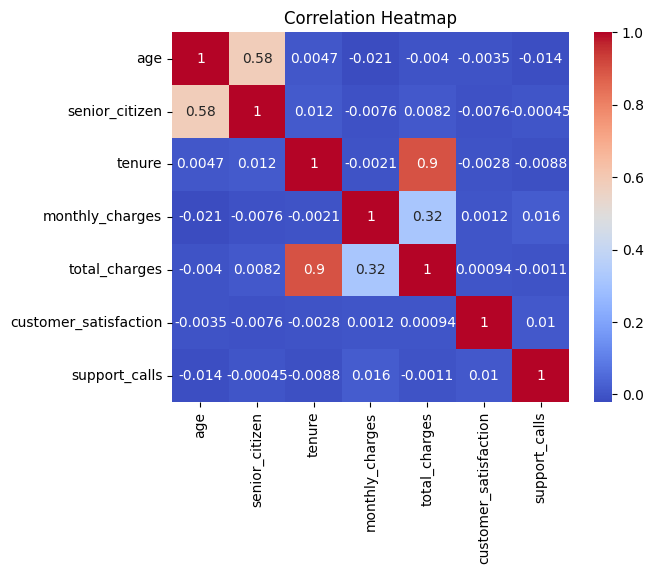

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df['churn'].value_counts()
churn_rate = churn_counts['Yes'] / churn_counts.sum()

sns.countplot(data=df, x='churn')
plt.title('Churn Distribution')
plt.show()

sns.countplot(data=df, x='gender', hue='churn')
plt.title('Gender vs Churn')
plt.show()

sns.countplot(data=df, x='senior_citizen', hue='churn')
plt.title('Senior Citizen vs Churn')
plt.show()

sns.countplot(data=df, x='internet_service', hue='churn')
plt.title('Internet Service vs Churn')
plt.show()

sns.boxplot(data=df, x='churn', y='monthly_charges')
plt.title('Monthly Charges vs Churn')
plt.show()

sns.countplot(data=df, x='payment_method', hue='churn')
plt.title('Payment Method vs Churn')
plt.xticks(rotation=45)
plt.show()

numerical_features = df.select_dtypes(include=['float64', 'int64'])
correlation = numerical_features.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
df.dropna(inplace=True)

label_cols = df.select_dtypes(include=['object']).columns.drop('churn')
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

df['churn'] = df['churn'].map({'No': 0, 'Yes': 1})

X = df.drop('churn', axis=1)
y = df['churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_preds)

dt = DecisionTreeClassifier()
dt_params = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt, dt_params, cv=3)
dt_grid.fit(X_train, y_train)
dt_preds = dt_grid.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)

rf = RandomForestClassifier()
rf_params = {'n_estimators': [50, 100], 'max_depth': [5, 10], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(rf, rf_params, cv=3)
rf_grid.fit(X_train, y_train)
rf_preds = rf_grid.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

svm = SVC()
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm, svm_params, cv=3)
svm_grid.fit(X_train, y_train)
svm_preds = svm_grid.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)

print("Logistic Regression Accuracy:", log_reg_acc)
print("Decision Tree Accuracy:", dt_acc)
print("Random Forest Accuracy:", rf_acc)
print("SVM Accuracy:", svm_acc)

Logistic Regression Accuracy: 0.782
Decision Tree Accuracy: 0.7875
Random Forest Accuracy: 0.7845
SVM Accuracy: 0.7765


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dt_grid,
    'Random Forest': rf_grid,
    'SVM': svm_grid
}

metrics = {}

for name, model in models.items():
    y_test_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred)
    rec = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    cm = confusion_matrix(y_test, y_test_pred)
    metrics[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1, 'Confusion Matrix': cm}

import pandas as pd
metric_df = pd.DataFrame({model: metrics[model] for model in metrics}).T.drop(columns='Confusion Matrix')
print(metric_df)

for name in models:
    print(f"{name} Confusion Matrix:\n{metrics[name]['Confusion Matrix']}\n")

best_model_name = metric_df['F1-Score'].idxmax()
best_model = models[best_model_name]

y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print(f"Best Model on Test Set: {best_model_name}")
print(f"Accuracy: {test_acc}")
print(f"Precision: {test_prec}")
print(f"Recall: {test_rec}")
print(f"F1-Score: {test_f1}")
print(f"Confusion Matrix:\n{test_cm}")

                    Accuracy Precision    Recall  F1-Score
Logistic Regression    0.782  0.594771  0.195699  0.294498
Decision Tree         0.7875  0.651515  0.184946  0.288107
Random Forest         0.7845  0.632812  0.174194  0.273187
SVM                   0.7765    0.6125  0.105376  0.179817
Logistic Regression Confusion Matrix:
[[1473   62]
 [ 374   91]]

Decision Tree Confusion Matrix:
[[1489   46]
 [ 379   86]]

Random Forest Confusion Matrix:
[[1488   47]
 [ 384   81]]

SVM Confusion Matrix:
[[1504   31]
 [ 416   49]]

Best Model on Test Set: Logistic Regression
Accuracy: 0.782
Precision: 0.5947712418300654
Recall: 0.1956989247311828
F1-Score: 0.29449838187702265
Confusion Matrix:
[[1473   62]
 [ 374   91]]
